### Regression
Given the following values of X and Y, 

(1,1), (2,2), (4,4), (100,100), (20, 20)

what is the value of Y when X = 5??

The answer is : 5.


Regression is Predicting a continuous-valued attribute(Attribute which is measurable like height, weight, time) associated with an object

$$y = mx + c$$

Y is a function of x and this is an equation of a straight line. 

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png)


In Simple Linear regression, we have a variable x(x1, x2, ..., xn) and a dependent variable y(y1, y2, ..., yn) which follows a linear relationship with x similar to **y = mx + c**. 
(House prices and Weight, height example)

We have set of observations (x1, y1), (x2, y2), ..., (xn, yn) and our task if to find out the optimal parameters(m and c)so as to make predictions for new data.





### What is Linear Regression

Linear Regression fits a linear model with coefficients w = (w1, …, wp) to minimize loss between the observed targets in the dataset

In [1]:
# Installing Packages
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install scikit-learn

In [1]:
# Importing Modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from scipy import stats
import seaborn as sns
sns.set(style="darkgrid")
plt.style.use('ggplot')

### Example

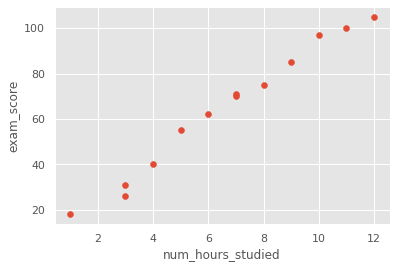

In [2]:
num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12])
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97, 100, 105])
plt.scatter(num_hours_studied, exam_score)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.show()

We can clearly see that there is a linear relationship. So in order to predict the exam_score for new tests or exams, given value of num hours studies, we need a linear model which can take input as num_hours_studies and return us the exam_score


### But How??


We have

$$y = mx + c$$

Here for known data, we already have x values and y values. we just need to approximate **m and c**. Then we will have a straight line
In machine learning, we represent it as

$$y = Wx + b$$

where W is the weight vector(how much importance is assigned to a feature) and b is the bias or the intercept.

We want to have a value of m and c which best fits our data. So there should be a proper mechanism so find out.


#### Hypothesis

Here we are making a "hypothesis" about the true nature of the underlying function - that it is linear.

$$y = h_\theta(x) = Wx + c$$



## Loss Function

Here we have 2 parameters W and b and in order to approximate y and changing the values of m and c will give us different lines. So we have to find the optimal line i.e optimal value of m and c

We need a mechanism which can tell us how much loss we are incurring on selecting parameter values. This is achieved using a loss function.

Therefore, we use mean squared error for this

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y^{(i)} - h_\theta^{(i)})^2$$


The solution to above equation is
$$\mathbf{W}^* = (\mathbf{X}^\top\mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}$$

### Normalization

It is a good idea to normalize all the values in the design matrix. This means all values should be in the range $(0, 1)$ and centered around zero.

![normalization](http://cs231n.github.io/assets/nn2/prepro1.jpeg)

(Image taken from http://cs231n.github.io/neural-networks-2/)

Normalization helps the learning algorithm perform better.
Fortunately, `sklearn.linear_model.LinearRegression` has an initialization parameter `normalize` that will take care of this for you.

## Outline

    
    1 Preprocessing
        1.1 Understanding the problem and the data available
        1.2 Normality and skewness
        1.3 Missing values
        1.4 Dummy encoding
        1.5 Rescaling
    2 Regression
        2.1 Linear regression
        2.2 L1 regularisation
        2.3 L2 regularisation
        2.4 ElasticNet regularisation


In [3]:
# Data split

num_hours_studied = np.array([1, 2, 3, 4, 5, 6, 7, 7, 8, 9, 10, 11, 12])
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97, 101, 105])

x_train = np.array([[1], [2], [3], [4], [5], [6], [7], [7], [8], [10], [12]])
y_train = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 97, 105])

x_test = [[9], [11]]
y_test = [85, 100]

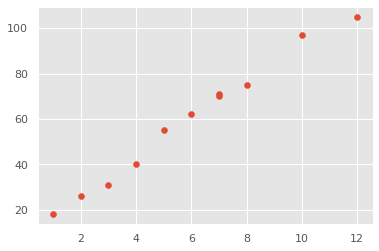

In [4]:
plt.scatter(x_train, y_train)

In [5]:
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [6]:
print('Model Coeff:  ' + '{}'.format(model.coef_))
print('Model Bias: ' + '{}'.format(model.intercept_))

Model Coeff:  [8.37922705]
Model Bias: 9.577294685990324


In [7]:
def plot_curve(x, coef, bias):
    y = x * coef + bias
    plt.plot(x, y, color='g')

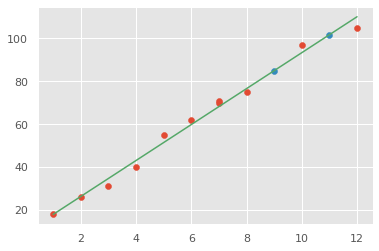

In [8]:
pred = model.predict(x_test)
plt.scatter(x_train, y_train)
plt.scatter(x_test, pred)
plot_curve(num_hours_studied, model.coef_, model.intercept_)

# Predicting Car Sales Price

In [10]:
df = pd.read_csv('/home/convolution/Downloads/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


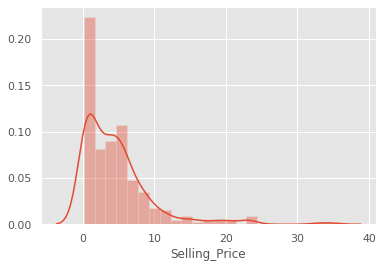

In [11]:
sns.distplot(df.Selling_Price)

In [13]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

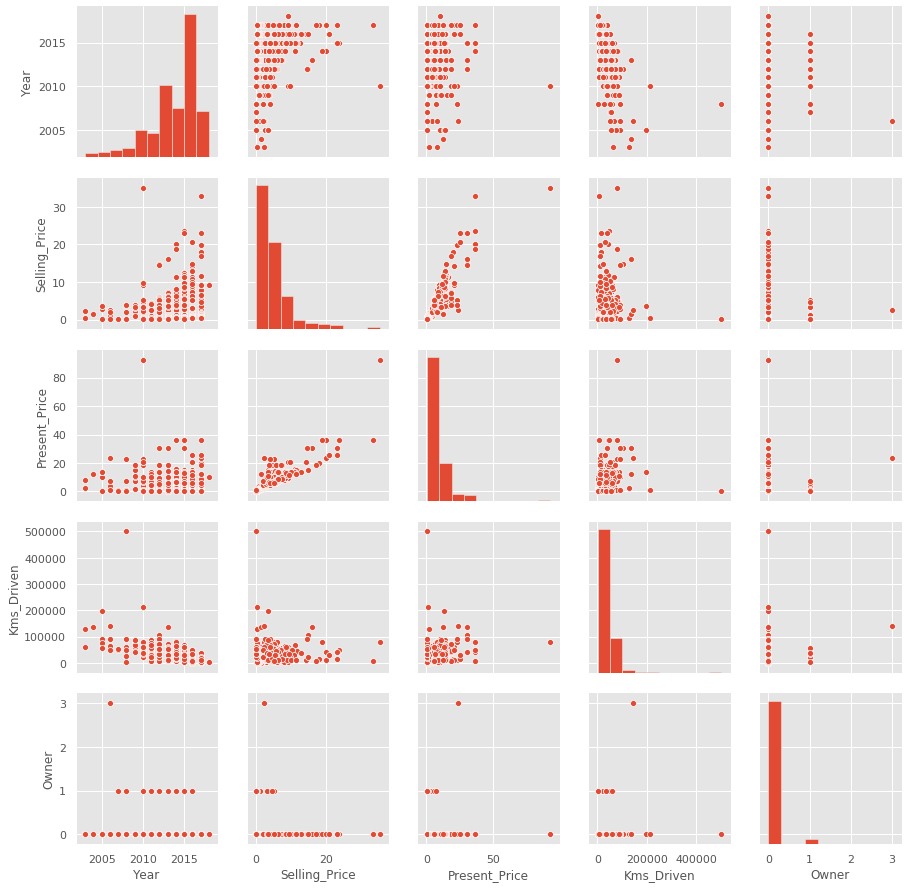

In [12]:
sns.pairplot(df)

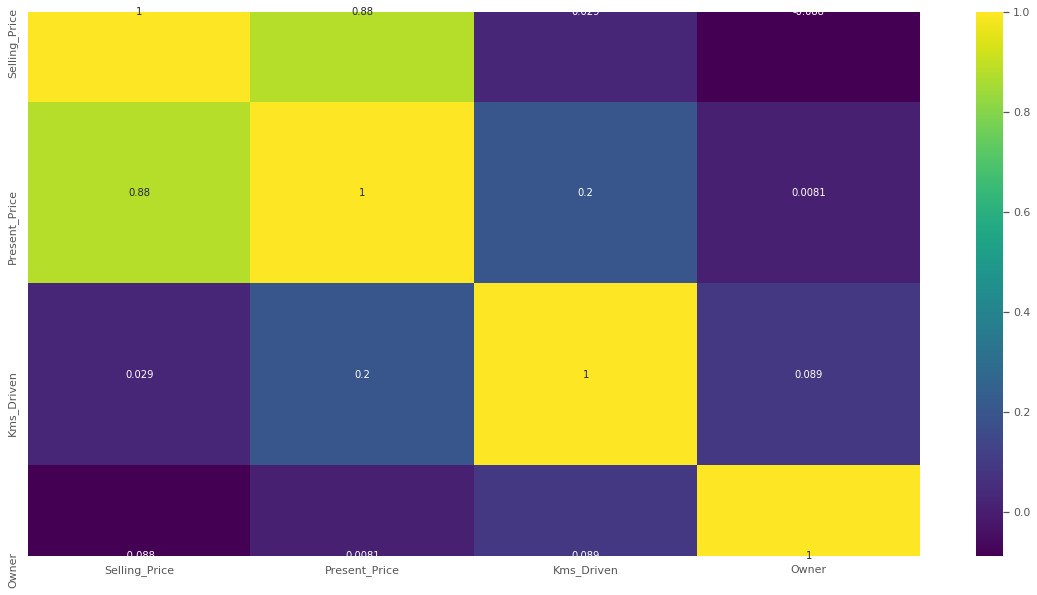

In [22]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(df.drop('Year', axis = 1).corr(), annot=True, cmap = 'viridis')

In [23]:
y = df['Selling_Price'].values
df = pd.get_dummies(df[['Kms_Driven', 'Present_Price', 'Fuel_Type']])

In [24]:
df.head()

,Kms_Driven,Present_Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,27000,5.59,0,0,1
1,43000,9.54,0,1,0
2,6900,9.85,0,0,1
3,5200,4.15,0,0,1
4,42450,6.87,0,1,0


In [25]:
x = df[['Kms_Driven', 'Present_Price', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [31]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
coeff_df = pd.DataFrame(model.coef_,df.columns,columns=['Coefficient'])
ranked_features = coeff_df.sort_values("Coefficient", ascending = False)
ranked_features

,Coefficient
Fuel_Type_Diesel,1.881890
Present_Price,0.473207
Kms_Driven,-0.000022
Fuel_Type_Petrol,-0.755999
Fuel_Type_CNG,-1.125891


# Regularization


Sometimes, a feature may get too high importance. Therefore, in order to make the model more robust to unseen data, we need to avoid weights taking too high values. This technique is known as reqularization

* L1 regularization: Adding sum of weight values scaled by a constant. Also known as Lasso
* L2 regularization: Adding sum of square of weight values scaled by a constant. Also known as Ridge

In [34]:
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
coeff_df = pd.DataFrame(lasso.coef_,df.columns,columns=['Coefficient'])
ranked_features = coeff_df.sort_values("Coefficient", ascending = False)
ranked_features

,Coefficient
Present_Price,0.515811
Fuel_Type_CNG,-0.000000
Fuel_Type_Diesel,0.000000
Fuel_Type_Petrol,-0.000000
Kms_Driven,-0.000019


In [38]:
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [39]:
coeff_df = pd.DataFrame(ridge.coef_,df.columns,columns=['Coefficient'])
ranked_features = coeff_df.sort_values("Coefficient", ascending = False)
ranked_features

,Coefficient
Fuel_Type_Diesel,1.712064
Present_Price,0.474275
Kms_Driven,-0.000022
Fuel_Type_CNG,-0.834813
Fuel_Type_Petrol,-0.877251


## L1 vs L2

![](http://www.chioka.in/wp-content/uploads/2013/12/L1-vs-L2-properties-regularization.png)